# *Aufgabe: Gradientenverfahren*

0. Importieren Sie alle die nötigen Bibliotheken.

In [30]:
from typing import Any, Tuple

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib import cm

1. Implementieren Sie auf Grundlage eines linearen Modells für Regressionen das Gradientenverfahren. Verwenden Sie die gleichen Daten wie in Aufgabe Modul 4:

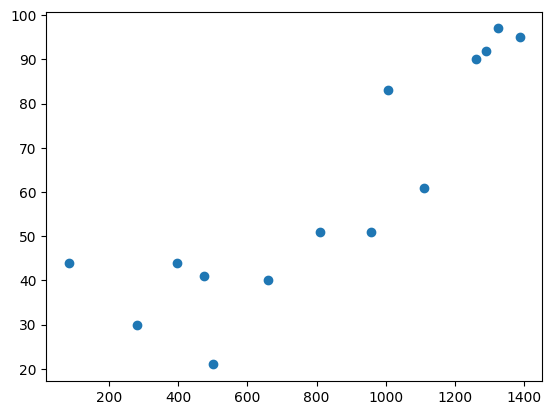

In [31]:
studying = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
result = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])

plt.scatter(studying, result)
plt.show()

Errechnen Sie dafür den Fehler (MSE / SSE) in jede Iteration und passen Sie die Gewichte Ihres Modells auf dessen Grundlage an. Zusatzaufgabe: fügen Sie auch das Bias hinzu.

In [32]:
def sse(y_pred: np.array, y: np.array) -> float:
    """Calculate the Error Sum of Squares.

    Args:
        y_pred (np.array): Array of predictions.
        y (np.array): Array of real targets.

    Returns:
        float: The error sum of squares.
    """
    return np.sum((y_pred-y)**2)

# Initialwerte
w = 1
b = 10

# Anzahl der Epochen:
epochs = 1000

# Learning rate für Gewicht und Bias:
lr_w = 0.00000001
lr_b = 0.001

# Initalisieren der Fehlerlist um alle Fehler zu speichern
error = []

# Gehe durch alle Epochen
for _ in range(epochs):

    # Berechnen der Vorhersagen
    predicted = w * studying + b

    # Speichern des Fehlers für die spätere Visualisierung
    error.append(sse(predicted, result))

    # Berechne die Gradienten basierend auf den Formeln
    gradient_w = 2 * np.dot(studying, predicted - result)
    gradient_b = 2 * np.sum(predicted - result)

    # Berechne die neuen Gewichte/Biases basierend auf den alten Werten, der Learning rate und den Gradienten
    w = w - lr_w * gradient_w
    b = b - lr_b * gradient_b


print("Lineares Modell: result = {} * studying + {}. Error: {}".format(w, b, error[-1]))

Lineares Modell: result = 0.05382241720542948 * studying + 15.544336342262378. Error: 2138.2721853540347


Zeigen Sie, dass Sie nach einer gewissen Anzahl Epochen (Iterationen) den Fehler Ihres Modells minimiert haben. 

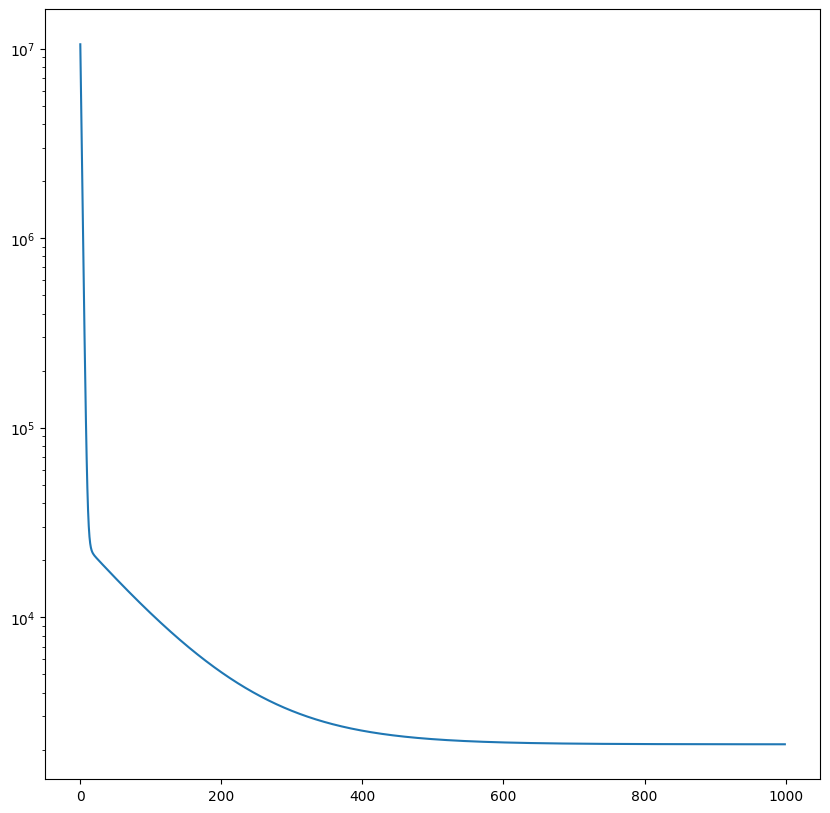

In [33]:
# Visualisieren des Fehlers über die Epochen
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(range(epochs), error)

# Setze die Skala auf eine Logarithmusskala um den Verlauf besser sehen zu können
ax.set_yscale('log')

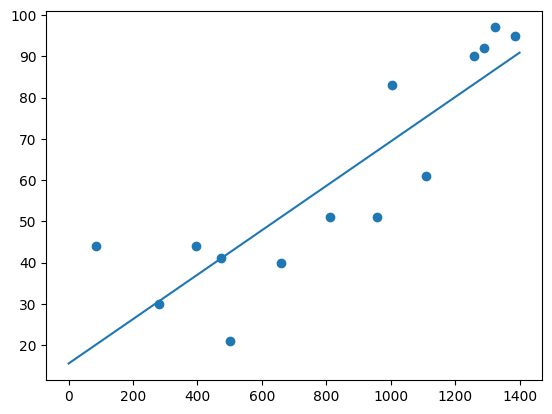

In [34]:
# Darstellung des Endergebnis

x = np.linspace(0, 1400)
y = w * x + b

plt.scatter(studying, result)
plt.plot(x, y)

plt.show()

Zusatzaufgabe 1. Implementieren Sie ein Momentum für Ihr Gradientenverfahren

Lineares Modell: result = 0.05329659686118157 * studying + 16.074703961161408. Fehler: 2137.4510488130563


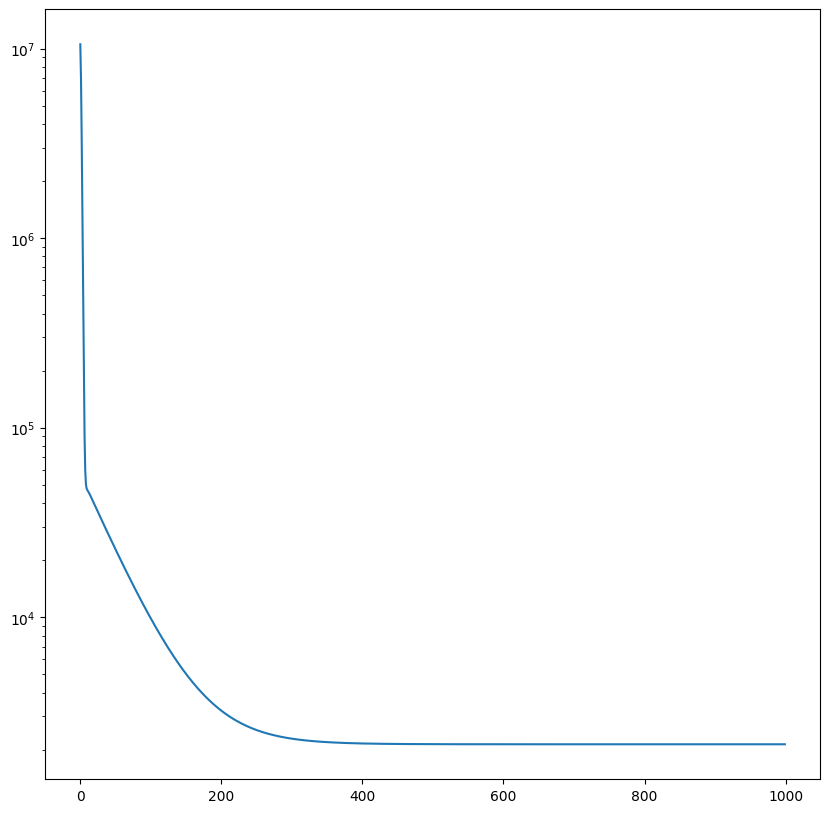

In [35]:
w = 1
b = 10

# Initalisieren des Momentums und der Velocity
momentum_w = 0.2
momentum_b = 0.5
velocity_w = 0.3
velocity_b = 10
epochs = 1000

error = []
# Mehrere Epochen trainieren
for _ in range(epochs):
    predicted = w * studying + b

    error.append(sse(predicted, result))

    gradient_w = 2 * np.dot(studying, predicted - result)
    gradient_b = 2 * np.sum(predicted - result)

    # Berechnen der neuen Gewichte anhand der Velocity des Momentums
    velocity_w = momentum_w * velocity_w - lr_w * gradient_w
    w += velocity_w

    velocity_b = momentum_b * velocity_b - lr_b * gradient_b
    b += velocity_b

print("Lineares Modell: result = {} * studying + {}. Fehler: {}".format(w, b, error[-1]))

# Wieder Darstellung des Fehlers
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(range(epochs), error)
ax.set_yscale('log')

Zusatzaufgabe 2: Wiederholen Sie den Schritt 2 für die Logistische Regression. 

In [36]:
# Definieren der Funktionen

def logloss(y_pred: np.array, y: np.array) -> float:
    """Calculate Logloss.

    Args:
        y_pred (np.array): Prediction array
        y (np.array): Target array.

    Returns:
        float: Logloss between prediction and target.
    """
    return -np.mean(y * (np.log(y_pred)) + (1 - y) * np.log(1 - y_pred))

def sigmoid(z: np.array) -> np.array:
    """Sigmoid function on a matrix.

    Args:
        z (np.array): Array to put the Sigmoid function on.

    Returns:
        np.array: Array of 1 or 0 after the sigmoid function.
    """
    return 1.0 / ( 1.0 + np.exp(-z))

def softmax(z: np.array) -> np.array:
    """Softmax function.

    Args:
        z (np.array): Array before the softmax.

    Returns:
        np.array: Array after the softmax function.
    """
    return np.exp(z)/sum(np.exp(z))

def predict(x: np.array, w: float, b: float) -> np.array:
    """Predict the values based on features, weight and baios

    Args:
        x (np.array): The feature array.
        w (float): The weight.
        b (float): The bias.

    Returns:
        np.array: The array of predictions.
    """

    return np.clip(sigmoid(np.dot(x,w)+b), 0.0000001, 0.999999)

def plot_original_data(ax: Any, x: np.array, y: np.array):
    """Plot original data. Based on their values they will be coloured and labelled differently.

    Args:
        ax (Any): axis of the subplot.
        x (np.array): feature array.
        y (np.array): target array.
    """
    ax.scatter(
        x[np.argwhere(y >= 50)].ravel(),
        y[np.argwhere(y >= 50)].ravel(),
        c="green",
        label="Bestanden",
    )
    ax.scatter(
        x[np.argwhere(y < 50)].ravel(),
        y[np.argwhere(y < 50)].ravel(),
        c="red",
        label="Nicht bestanden",
    )


def gradient(x: np.array, y: np.array, prediction: np.array) -> Tuple[float, float]:
    """Calculate the gradients

    Args:
        x (np.array): Array of input variables.
        y (np.array): Array of target variable.
        prediction (np.array): Array of predictions.

    Returns:
        Tuple[float, float]: Tuple containing the gradient for the weight and the bias.
    """
    m = x.shape[0]
    dw = 1/m*np.sum(np.dot(x.T, (prediction - y)))
    db = 1/m*np.sum((prediction - y))
    return dw,db


def discretize(x: np.array) -> np.array:
    """Discretize the input array.

    Args:
        x (np.array): Input array.

    Returns:
        np.array: Array of 1 or 0 after discretization.
    """
    return np.where(x >= 0.5, 100, 0)


Lineares Modell: result = sigmoid(0.7602267884892517 * studying + -0.5717894878188939). Accuracy: 70.0%


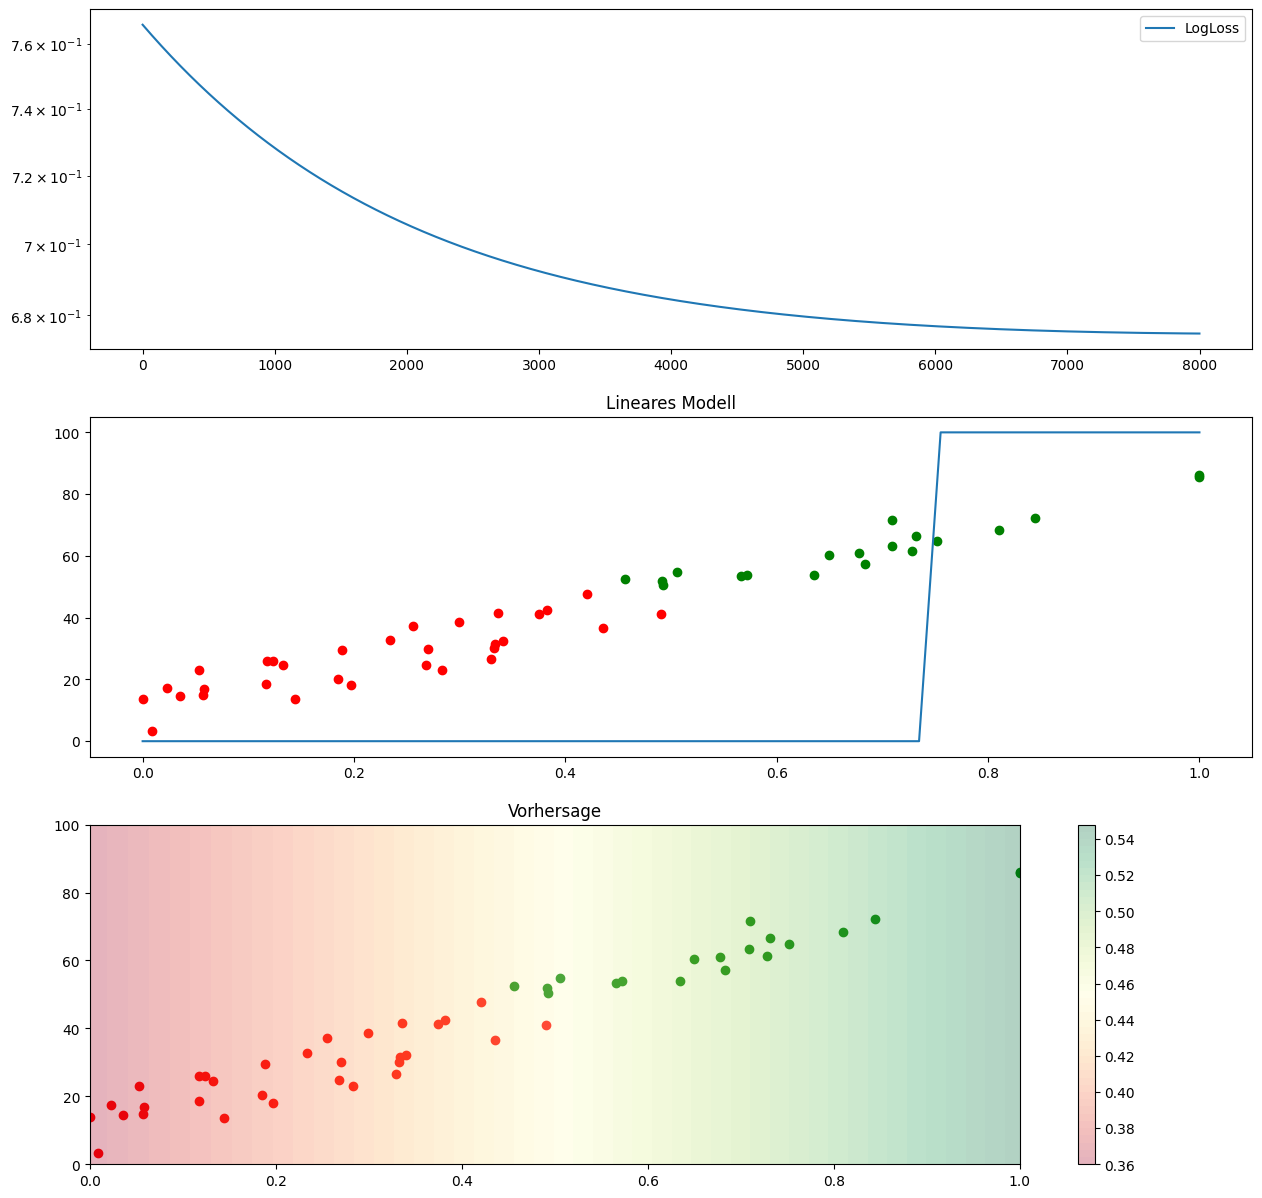

In [37]:
# Hier benutzen wir neue Daten, die wir selbst "basteln":
x = np.random.randint(0,1400,50)
y = x*0.053+16  # Das ist die bekannte Lösung
y += np.random.normal(-5,5,50)  # Plus ein bisschen Rausch

x = x.reshape(-1, 1)
studying = x
result = y

# Ergebnis binarisieren
result_binary = np.array([1 if i >= 50 else 0 for i in result])

# X Werte normalisieren
scaler = MinMaxScaler()
studying = scaler.fit_transform(studying.reshape(-1, 1))

# Initialwerte
w = 0.3
b = 0.3

# Anzahl der Epochen:
epochs = 8000

# Learning rate:
lr = 0.001

error = []
for _ in range(epochs):
    predicted = predict(studying, w, b)

    # Fehler für die spätere Visualisierung
    error.append(logloss(predicted, result_binary))
    gradient_w, gradient_b = gradient(studying, result_binary, predicted.squeeze())

    # Berechnen der neuen Gewichte/Bias
    w -= lr * gradient_w
    b -= lr * gradient_b

# Accuracy für die letzte Epoche berechnen
score = accuracy_score(np.array([1 if i > 0.5 else 0 for i in predicted]), result_binary)*100

# Letztes Ergebnis ausgeben
print("Lineares Modell: result = sigmoid({} * studying + {}). Accuracy: {}%".format(w, b, round(score, 2)))

# Visualisierung Fehler:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
ax1.plot(range(epochs), error, label='LogLoss')
ax1.set_yscale('log')
ax1.legend()

# Visualisierung Modell:
ax2 = fig.add_subplot(312)
ax2.set_title("Lineares Modell")
plot_original_data(ax2, studying, result)

x_axis = np.linspace(0, 1)
ax2.plot(x_axis, discretize(sigmoid(w * x_axis + b)))


# Visualisierung Vorhersage:
ax3 = fig.add_subplot(313)
ax3.set_title("Vorhersage")
plot_original_data(ax3, studying, result)

# X- und Y-Achsen definieren und darüber die gesamte 2-D Fläche
x_axis, y_axis = np.linspace(0, 1), np.linspace(0, 100)
x1, x2 = np.meshgrid(x_axis, y_axis)


# Berechne die Ergebnisse für den gesamten Wertebereich
z = np.array([predict(x_axis, w,  b) for y in y_axis])

# Darstellung der Ergebnise anhand einer Contourmap mit Einfärbung
contourf_ = ax3.contourf(x1,x2,z.reshape(50,50),cmap=cm.RdYlGn,levels=50,alpha=0.3)
fig.colorbar(contourf_, ax=ax3)
